In [15]:
import numpy as np
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler


In [16]:
def readFile(name_of_file):
    with open(name_of_file, 'r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)

        # Create an empty list to store the data
        rows = []

        # Read the data of the file into data
        for row in csv_reader:
            rows.append(row)

        # Convert the data to a numpy array and convert to float
        all_data = np.array(rows, dtype=np.float64)
        return all_data
    
X = readFile('x_data.csv')
y = readFile('y_data.csv')


(1797, 1)
(1797, 64)
[0.]
[1.]
[4.]


In [17]:
## standardization of x

scaler = StandardScaler()
X_scaled_df = scaler.fit_transform(X)

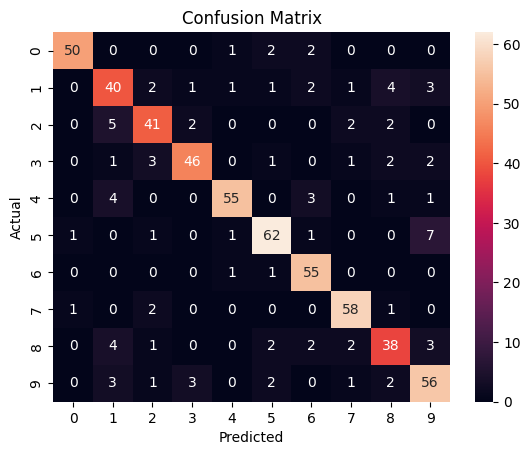

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93        55
         1.0       0.70      0.73      0.71        55
         2.0       0.80      0.79      0.80        52
         3.0       0.88      0.82      0.85        56
         4.0       0.93      0.86      0.89        64
         5.0       0.87      0.85      0.86        73
         6.0       0.85      0.96      0.90        57
         7.0       0.89      0.94      0.91        62
         8.0       0.76      0.73      0.75        52
         9.0       0.78      0.82      0.80        68

    accuracy                           0.84       594
   macro avg       0.84      0.84      0.84       594
weighted avg       0.85      0.84      0.84       594



In [18]:
def logistic(X, y):
    y_pred_all = []
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    for index in range(0,10):
        y_hat = np.zeros((y_train.shape))
        y_hat = y_hat.reshape(y_hat.shape[0],)

        for i in range(y_train.shape[0]):
            if y_train[i] == index:
                y_hat[i] = 1
        logistic_regression = LogisticRegression()
        logistic_regression.fit(X_train, y_hat)
        y_pred = logistic_regression.predict_proba(X_test)
        y_pred_all.append(y_pred)
    y_pred_all = np.array(y_pred_all).T
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred_all[1].argmax(axis=1))

    sn.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=range(10), yticklabels=range(10))
    plt.title("Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    report = metrics.classification_report(y_test,y_pred_all[1].argmax(axis=1))
    print(report)    
        
logistic(X_scaled_df, y)


conclusion:

In the confusion matrix the main diagonal represents the number of correctly predicted cases. You can see that in my results the values ​​on the diagonal are relatively high, so the algorithm worked good.

The elements in the row except for the element of the diagonal is the number of times we predicted that it is a different class even though it is the class of the row, we can see the numbers there are quite low which is a good thing.

The elements in a particular column except for the element of the diagonal indicates the number of times we predicted that this is the class of the column even though it is other classes, we can see the numbers here is low too.